# Course Code

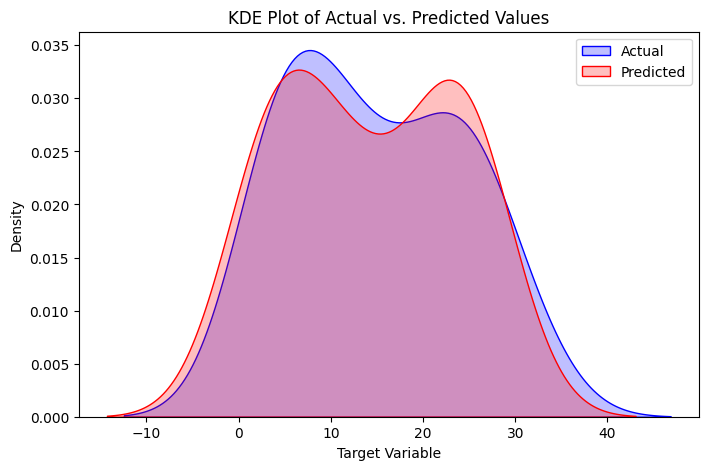

In [ ]:
import numpy as np
import pandas as pds
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Generating Sample Data
np.random.seed(42)
x = np.random.rand(100) * 10
y = 3 * x + np.random.normal(0, 3, 100)  # Linear relation with noise
data = pds.DataFrame({'X': x, 'Y': y})

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(data[['X']], data['Y'], test_size=0.2, random_state=42)

# Training a Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Plotting KDE for Observed vs. Predicted Values
plt.figure(figsize=(8, 5))
sns.kdeplot(y_test, label='Actual', fill=True, color='blue')
sns.kdeplot(y_pred, label='Predicted', fill=True, color='red')
plt.xlabel('Target Variable')
plt.ylabel('Density')
plt.title('KDE Plot of Actual vs. Predicted Values')
plt.legend()
plt.show()

# Clarification

### Formula
$$
\hat{f}_h(x) = \frac{1}{nh} \sum^n_{i=1}K(\frac{x-x_i}{h})
$$

### Silvana's Rule for h selection
$$
h \approx \frac{1.06 \hat{\sigma}}{\sqrt[5]n}
$$

$\hat{\sigma}$ is sample standard deviation

In [30]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# generating data

np.random.seed(69)

n = 150
    # number of data points

x_data = np.random.normal(size = n)*10
x_data = np.round(x_data).astype(int)
x_data


array([  9,  -6,  12,  -6, -16,   4,  12,  11,   9,   7,  -2,  -5,  -8,
        12, -13,  -1,  -5, -19, -18,   3,   9, -12,   7, -11, -20, -12,
         2, -21,   0,   3, -10,  16,   4,  -7, -12, -23,  -7,  -3,  14,
        -2,  -2, -14,  -2,  -1,   1,   8, -16, -14,   9,   4,  14, -25,
         2, -12,  -7,  11,  -7,  19,  15, -18,  -6,   1,  17,  -7,   1,
       -17, -21,   7,  -7,  -2,  -2,  -2,  15,  -4,   8,  15,   9, -12,
         6,  -8,  14,  16,   4,  19,  18,  14,   8,  -4, -15,   4,   2,
         9,  -2,   9,  21,   9,   1,   2, -15,  -3,  -3,   5,   3,  -6,
        -1,  -3,  10,  -2,  17,  -5, -13, -23,  -9,  10,  19,   9,  -5,
         2, -23,   1, -20, -13,   3,  -3,  14,  -2, -17,  11,   8,   5,
         3,  -5,  22,  18,  -1,  10,  -1, -12,   0,  -9,   7,   3, -12,
        -9,  10,   8, -11,  -6,   3, -10])

In [32]:
# calculating bandwidth h

sample_std = np.std(x_data)
h = 1.06*sample_std/n**(0.2)
h

4.257208617990596

Declring required functions
1. kernel function
2. kde estimation function

In [33]:
def kernel_f(x, xi, h):
    u = (x-xi)/h
    return 1/math.sqrt(2*math.pi)*math.e**(-1*u*u/2)

In [34]:
def kde_f(x, data, h):
    sum = 0
    for xi in data:
        sum += kernel_f(x, xi, h)
    
    return sum/n/h

In [ ]:
# generating data for kde plot
x_kde = np.linspace(x_data.min(), x_data.max(), n*20)
    # min and max is from the original data
    # now dividing this range into n*20 segments for smoother plot
    # results a list of equally distributed numbers over that range which has n*20 values 
y_pred = np.array([])
    # predicted value of pdf of x

for x in x_kde:
    y_pred = np.append(y_pred, kde_f(x, x_data, h))

In [36]:
y_pred

array([0.00484676, 0.00486291, 0.00487909, ..., 0.00595713, 0.00593523,
       0.00591336])

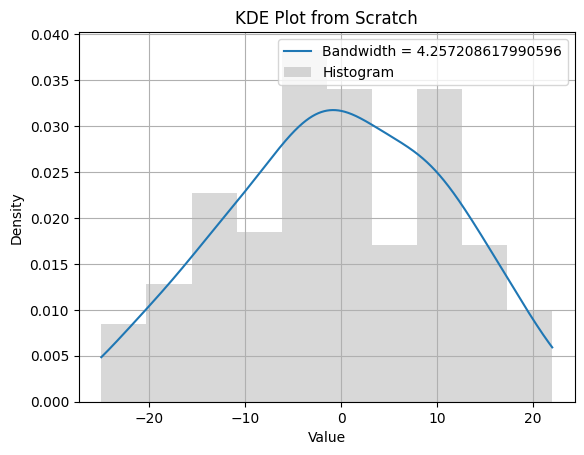

In [ ]:
# Plot
plt.plot(x_kde, y_pred, label=f'Bandwidth = {h}')
plt.hist(x_data, bins=10, density=True, alpha=0.3, color='gray', label='Histogram')
plt.title('KDE Plot from Scratch')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()